# Simple transcription-translation system modeled by a deterministic ODE system

## Biochemical reactions

In a simple transcription-translation system the RNA of a certain gene is prodcued with a fixed rate $\beta$ and decays with a rate proportional to the curren amount of RNA, a so called first order decay. The protein that our gene is coding for is produced with a rate that is proportional to the current amount of RNA and follows a first order decay as well. A reaction scheme of this small system looks like this:

$$\xrightarrow{k_{1}} RNA \xrightarrow{d_{1}} o$$ $$RNA \xrightarrow{k_{2}} protein$$ $$protein \xrightarrow{d_{2}} o$$

## Deterministic ODE system

The above reaction scheme can be tranlated into two [differential equations](https://en.wikipedia.org/wiki/Differential_equation). For the sake of simplicity we have assumed [mass action kinetics](https://en.wikipedia.org/wiki/Law_of_mass_action) without any saturation effects.

$$ \frac{\mathrm{d}RNA}{\mathrm{d}t} = k_{1} - d_{1}\cdot RNA$$ 

$$ \frac{\mathrm{d}protein}{\mathrm{d}t} = k_{2}\cdot RNA - d_{2} \cdot protein$$

This system of equations describes the rule how the systems state given by the concentration of RNA and protein molecules changes given the current state. The left hand side of the equations are the rate of change and the right hand side the rule how the change depends on the current state. Note that the concentration of RNA appears in both equations, thus the equations are coupled as the amount of proteins depends on the amount of RNA.

To explicitly solve ODEs it is necessary to know the state of the system at one instant of time. Often refered to as the intial conditions and associated with time point $t = 0$. 

We assumed the transcription rate $\beta$ to be constant over time. You can imagine this situation as if at time point zero a transcription factor binds the gene's promoter and activates transcription. For now we will investigate the temporal evolution of the RNA and protein assuming constant transcription, later we will consider the case when transcription is only transiently activated.

### Steady state

The transcription-translation reaches a steady state, i.e. RNA and protein concentrations that do not change over time because the respective production and decay processes balance each other. In steady state the left hand side of the differential equations equals zero and we are left with two algebraic equations that we can solve to calculate the steady state:

**Exercise 1**

Solve the algebraic equations for the steady state: $RNA_{ss}$ and $P_{ss}$.

$$RNA_{ss} = \frac{k_{1}}{d_{1}}$$

$$P_{ss} = \frac{k_{2}\cdot RNA_{ss}}{d_{2}} = \frac{k_{1}k_{2}}{d_{1}d_{2}}$$

The steady state is fully determined by the biochemical reaction rates of our system and here it is a stable state. This means if we move the system out of steady state it will return.

## Analytic solution

The solution of the ODE system with the intital condition $RNA_{0} = protein_{0} = 0$ is given by:

$$ \text{RNA}(t)= RNA_{ss}\big( 1- e^{-d_{1} t}\big)$$

$$\text{protein}(t)= P_{ss}\bigg(1 - \frac{d_{1}e^{-d_{2}t} - d_{2}e^{-d_{2}t}}{d_{1} - d_{2}}\bigg)$$

For the simple ODE system given here it is possible to obtain a analytical solution, in more complex situations this usually is not possible and it is necessary to numerically integrate differential equations. Although we could work here with the analytical solutions we want to go the numerical way. A first impression on how an algorithm could approximate a solution of an ODE gives [Euler method](https://en.wikipedia.org/wiki/Euler_method).

In [1]:
# import libraries and define set desired options for plots
import pylab as pl
import numpy as np
import scipy as sp
import matplotlib as mpl
from matplotlib import gridspec
from scipy.optimize import fsolve
from scipy.integrate import odeint

setups = {'axes.labelsize': 16,
          'axes.titlesize': 18,
          'legend.fontsize': 12,
          'legend.loc': 'lower right',
          'font.family': 'sans-serif'
         }
mpl.rcParams.update(setups)

line_width = 2
color_rna = 'dodgerblue'
color_protein = 'darkorange'
color_phase_space = 'dimgrey'
color_initial_state = 'crimson'
color_steady_state = 'saddlebrown'

%matplotlib inline

In [2]:
# define functions to calculate ODEs
## numerical solution of the ODE system
def solve_ODE_transcription_translation(x,t,param):
    RNA, protein = x[0], x[1]
    # solve numerical solutions
    dRNA = param[0] - param[1]*RNA
    dprotein = param[2]*RNA - param[3]*protein 
    
    return np.hstack((dRNA,dprotein))


## analytical solution based on equations above
def analytic_solution(tt,param):
    # calculate steady states
    RNA_ss = param[0]/param[1]
    p_ss = param[0]/param[1]*param[2]/param[3]
    # solve analytical solutions
    RNA = RNA_ss*(1 - sp.exp(-param[1]*tt))
    protein = p_ss*(1 - (param[1]*sp.exp(-param[3]*tt) - param[3]*sp.exp(-param[1]*tt))/(param[1] - param[3]))

    return np.vstack((RNA,protein))

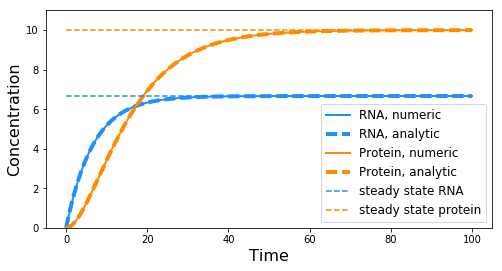

In [3]:
# define parameters to solve the ODEs
k_1 = 1 # transcription rate
d_1 = 0.15 # RNA decay rate
k_2 = 0.15 # translation rate
d_2 = 0.1 # protein decay rate
param = [k_1,d_1,k_2,d_2]

# calculate steady state
steady_state_RNA = k_1/d_1
steady_state_protein = k_2*k_1/d_1/d_2

# define intial conditions
RNA_0 = 0
protein_0 = 0
y_0 = [RNA_0,protein_0]

# set the simulation time 
tt = sp.linspace(0,100,200)

# solve the ODE system with the defined parameters and initial condition
sol_deterministic = odeint(solve_ODE_transcription_translation,y_0,tt,args = (param,))

# calculate the analytic solution
analytic = analytic_solution(tt,param)

# plot results
pl.figure(figsize = (8,4))
pl.plot(tt,sol_deterministic[:,0], label = 'RNA, numeric', lw = line_width,color = color_rna)
pl.plot(tt,analytic[0],'--',lw = 2*line_width, color = color_rna, label = 'RNA, analytic')
pl.plot(tt,sol_deterministic[:,1], label = 'Protein, numeric', lw = line_width, color = color_protein)
pl.plot(tt,analytic[1],'--',lw = 2*line_width, color = color_protein, label = 'Protein, analytic')
pl.plot(tt,np.zeros(len(tt)) + steady_state_RNA,'--',color = color_rna,label = 'steady state RNA')
pl.plot(tt,np.zeros(len(tt)) + steady_state_protein,'--',color = color_protein, label = 'steady state protein')
pl.xlabel('Time')
pl.ylabel('Concentration')
pl.ylim(0,steady_state_protein+steady_state_protein*0.1)
pl.legend()
pl.show()

## Influence of the RNA and protein decay rates on the time to reach the steady state

**Exercise 2.** Investigate an effect of different RNA and protein rates on kinetics of the given transcription-translation system:
- Solve ODE systems with the defined parameters and initial conditions
- Investigate the influence of different parameters on the system's behaviour by perturbing ```k_1, d_1, d_2``` (in II-IV conditions) 

**Questions:**
- Which rate(s) influence the steady state?
- Which rate(s) influence the kinetics, i.e. how fast the steady state is reached?

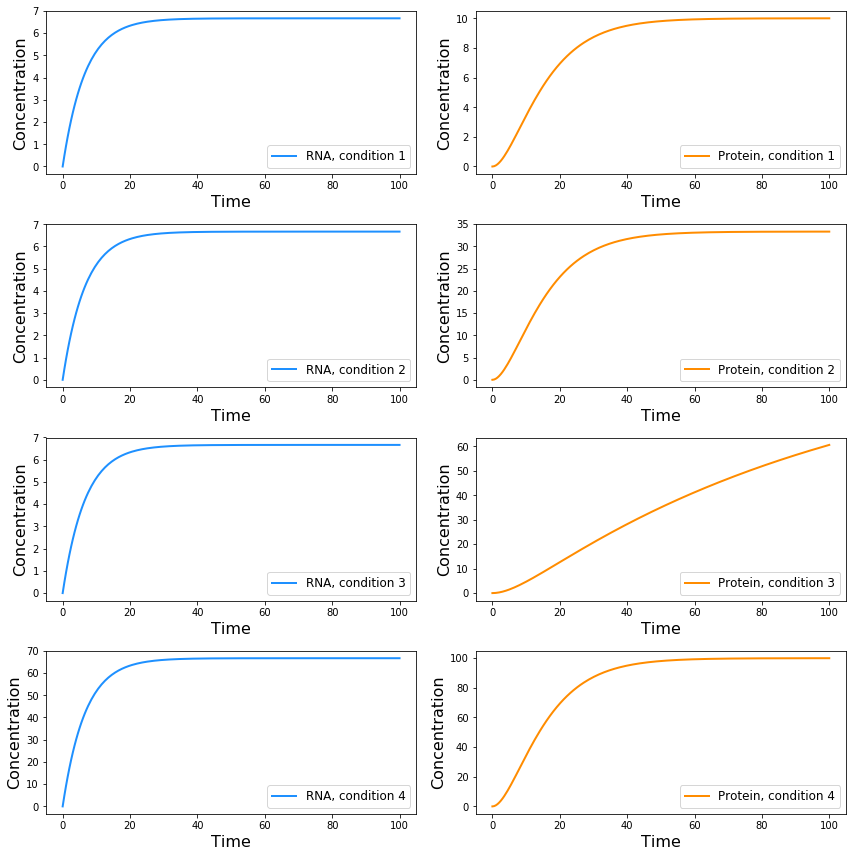

In [5]:
# define intial conditions 
RNA_0 = 0
protein_0 = 0
y_0 = [RNA_0,protein_0]
tt = sp.linspace(0,100,200)

# define parameter vector to solve the ODEs
## I) Reference parameters
k_1 = 1
d_1 = 0.15
k_2 = 0.15
d_2 = 0.1
param = [k_1,d_1,k_2,d_2]
sol_deterministic = odeint(solve_ODE_transcription_translation,y_0,tt,args = (param,))

## Perturbed parameters (RNA decay)
k_1 = 1
d_1 = 0.15
k_2 = 0.5
d_2 = 0.1
param1 = [k_1,d_1,k_2,d_2]
sol_deterministic1 = odeint(solve_ODE_transcription_translation,y_0,tt,args = (param1,))
#---------------------------------

## III) Perturbed parameters (protein decay)
k_1 = 1
d_1 = 0.15
k_2 = 0.15
d_2 = 0.01
param2 = [k_1,d_1,k_2,d_2]
sol_deterministic2 = odeint(solve_ODE_transcription_translation,y_0,tt,args = (param2,))
#---------------------------------

## IV) Perturbed parameters (RNA synthesis)
k_1 = 10
d_1 = 0.15
k_2 = 0.15
d_2 = 0.1
param3 =[k_1,d_1,k_2,d_2]
sol_deterministic3 = odeint(solve_ODE_transcription_translation,y_0,tt,args = (param3,))
#---------------------------------

# plot results
fig, ax = pl.subplots(4,2, figsize = (12,12))

ax[0,0].plot(tt,sol_deterministic[:,0], label = 'RNA, condition 1', lw = line_width,color = color_rna)
ax[0,0].legend()
ax[0,0].set_xlabel('Time')
ax[0,0].set_ylabel('Concentration')
ax[0,1].plot(tt,sol_deterministic[:,1], label = 'Protein, condition 1', lw = line_width, color = color_protein)
ax[0,1].legend()
ax[0,1].set_xlabel('Time')
ax[0,1].set_ylabel('Concentration')

ax[1,0].plot(tt,sol_deterministic1[:,0], label = 'RNA, condition 2', lw = line_width,color = color_rna)
ax[1,0].legend()
ax[1,0].set_xlabel('Time')
ax[1,0].set_ylabel('Concentration')
ax[1,1].plot(tt,sol_deterministic1[:,1], label = 'Protein, condition 2', lw = line_width, color = color_protein)
ax[1,1].legend()
ax[1,1].set_xlabel('Time')
ax[1,1].set_ylabel('Concentration')

ax[2,0].plot(tt,sol_deterministic2[:,0], label = 'RNA, condition 3', lw = line_width,color = color_rna)
ax[2,0].legend()
ax[2,0].set_xlabel('Time')
ax[2,0].set_ylabel('Concentration')
ax[2,1].plot(tt,sol_deterministic2[:,1], label = 'Protein, condition 3', lw = line_width, color = color_protein)
ax[2,1].legend()
ax[2,1].set_xlabel('Time')
ax[2,1].set_ylabel('Concentration')

ax[3,0].plot(tt,sol_deterministic3[:,0], label = 'RNA, condition 4', lw = line_width,color = color_rna)
ax[3,0].legend()
ax[3,0].set_xlabel('Time')
ax[3,0].set_ylabel('Concentration')
ax[3,1].plot(tt,sol_deterministic3[:,1], label = 'Protein, condition 4', lw = line_width, color = color_protein)
ax[3,1].legend()
ax[3,1].set_xlabel('Time')
ax[3,1].set_ylabel('Concentration')

pl.tight_layout()
pl.show()
pl.savefig("ex2.png")

Let's test the effect of the protein decay rates on the systems kinetcs. This time we define a set of decay rates, keep the steady state fixed by adjusting the protein production rate $k$ and then iterate over the defined rates in a for loop.

C:\ProgramData\App-V\88D81B12-5AE1-4667-B338-FF61FD44F764\5ABECF42-E018-4502-B306-B211BCBA35EA\Root\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


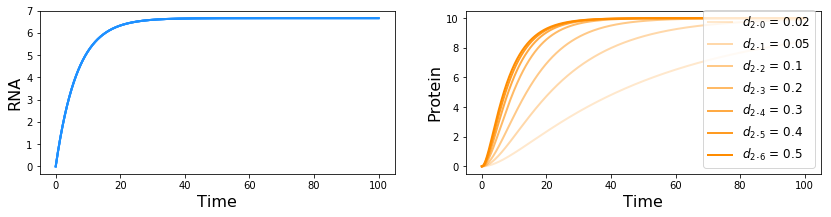

In [6]:
# define protein decay rates
D_2 = np.array([0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5])
K_2 = D_2 * steady_state_protein / steady_state_RNA

k_1 = 1
d_1 = 0.15

tt = sp.linspace(0,100,1000)
sol = []
for i, d_2 in enumerate(D_2):
    param = [k_1,d_1,K_2[i],d_2]
    s = odeint(solve_ODE_transcription_translation,y_0,tt,args = (param,))
    sol.append(s)
    
fig, ax = pl.subplots(1,2,figsize = (14,3))
alpha = sp.linspace(0.2,1,len(sol))
for i, ss in enumerate(sol):
    ax[0].plot(tt,ss[:,0],lw = line_width, color = color_rna, alpha = alpha[i])
    ax[1].plot(tt,ss[:,1],lw = line_width, color = color_protein, alpha = alpha[i], 
               label = '$d_2$.$_{}$ = {}'.format(i, D_2[i]))
ax[0].set_xlabel('Time')
ax[0].set_ylabel('RNA')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Protein')
ax[0].legend()
ax[1].legend()

The time to reach half steady state provides a measure for the response time of the system. The response time of the RNA depends only on RNA decay and can be calculated as:

$$\tau_{1/2, RNA} = \frac{\ln 2}{d_{1}}$$

As the plots above indicate the response time of the protein depends on both decay rates $\gamma_{m}$ and $\gamma_{p}$. The time to reach steady state is determined by

$$ \frac{d_{1}e^{-d_{2}t} - d_{2}e^{-d_{1}t}}{d_{1} - d_{2}} - \frac{1}{2} = 0$$


## Transient activation of gene transcription

Now we will investigate the case when gene transcription is only transiently activated by a transcription factor which in turn might me activated by a external stimulus. The biological scenario is that the transcription factor remains at the promoter only for a certain amount of time. Mathematically this means that the transcription rate is a function of time $k_1 = k_1(t)$. We assume the functional relation for $k_1$ to be:

$$k_1(t) = \beta\cdot e^{-r_1 t}\cdot (1 - e^{-r_{2}t})$$

**Exercise 3.** Tune the RNA decay rate to create different behaviour of the RNA time courses. Try to resemble the following expression characteristics as in the example from the paper [PMID:19198593]:
- fast and transient (cluster I)
- intermediate behaviour (cluster II)
- slow and sustained (cluster III)

In [7]:
def TF_binding(param,tt):
    p_1, p_2 = param[0],param[1]
    
    return sp.exp(-p_1*tt)*(1-sp.exp(-p_2*tt))


# ODE system with time varying transcription rate
def solve_ODE_time_dependent_transcription(x,t,param,param_binding):
    RNA = x[0]
    dRNA = param[0]*TF_binding(param_binding,t) - param[1]*RNA
    
    return dRNA

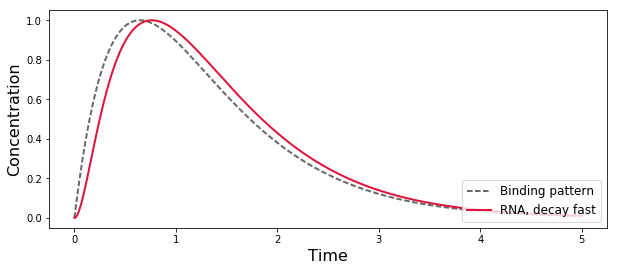

In [8]:
# define the binding pattern
p_1 = 1.5
p_2 = 0.1
param_binding = [p_1,p_2]
tt = sp.linspace(0,5,1000)
binding = TF_binding(param_binding,tt)
binding = binding/binding.max()
y_0 = 0

# define parameters to solve ODE systems
k_1 = 1
d_1 = 10
param = [k_1,d_1]
sol_fast = odeint(solve_ODE_time_dependent_transcription,y_0,tt,args = (param,param_binding))
sol_fast = sol_fast/sol_fast[:,0].max()

# You code here

pl.figure(figsize = (10,4))
pl.plot(tt, binding, ls='--', lw=line_width, color=color_phase_space, label='Binding pattern')
pl.plot(tt, sol_fast[:,0], label='RNA, decay fast', lw=line_width, color=color_initial_state)
pl.plot(tt, sol_fast[:,0], label='RNA, decay fast', lw=line_width, color=color_initial_state)

pl.xlabel('Time')
pl.ylabel('Concentration')
pl.legend()
pl.show()

## Correlation between RNA and protein abundance depends on the RNA decay rate

**Exercise 4.** Plot RNA and protein levels (rescaled) against each other for slow and fast protein decay (use simulations you created in Exercise 2).

**Question:** Under which conditions are RNA and protein strongly correlated?

In [ ]:
fig, ax 

# Circadian oscillations as an example of negative feedback

Circadian oscillations are our daily rhythms: activity, metabolism, sleep, etc. They are controlled by multiple genes that influence each other. The simple transcription-translation system that we were investigating so far is not able to create oscillations. For sustained oscillation we need negative feedback. This means that the protein acts back on its own transcription as a supressor. A second important ingredient to create oscillations is a time delay, thus, the feedback of the protein (here _Per1_) acts not instantaneous but with some delay. The protein _Per1_ exists in two forms here indicated as $protein$ and $protein_p$ which supresses its own transcription but first it has to be created which generates the delay. 

Here are the differential equations describing the negative feedback loop of _Per1_ on its own transcription. The feedback on the RNA prodiction is mediated by a special input function, a so called Hill-Function. A sigmoidal function, i.e. the effect of the feedback saturates and does not become arbitrarily large. The Hill-Coefficient $n$ describes the steepness of the Hill-Function. We will see during the investigation of the system that $n$ plays a cruicial role and that it has to pass a minimal threshold to obtain undampened oscillations.

$$\frac{dRNA}{dt} = k_{1}\frac{K_{i}^{n}}{K_{i}^{n} + protein_{p}^{n}} - k_{2} RNA $$

$$\frac{dprotein}{dt} = k_{3} RNA - k_4 protein$$

$$\frac{dprotein_{p}}{dt} = k_{5}protein - k_{6}protein_{p}$$

**Exercise 5.**
Implement negative feedback model and plot Z(t) for  the following parameters: 
$$k_{1} = k_{3} = k_{5} = 1$$
$$k_{2} = k_{4} = k_{6} = 0.1$$
$$K_{i} = 1,$$
$$n = 10$$

In [11]:
def circadian_ODEs(x,t,param):
    k_1, k_2, k_3, k_4, k_5, k_6, K_i, n = param[0],param[1],param[2],param[3],param[4],param[5],param[6],param[7]
    RNA = x[0]
    protein = x[1]
    protein_p = x[2]
    
    # write here the right hand side of the ODE
    dRNA = k_1 * K_i**n/(K_i**n + protein_p**n) - k_2*RNA
    dprotein = k_3*RNA - k_4*protein
    dprotein_p = k_5*protein - k_6*protein_p
    
    return np.hstack((dRNA,dprotein,dprotein_p))

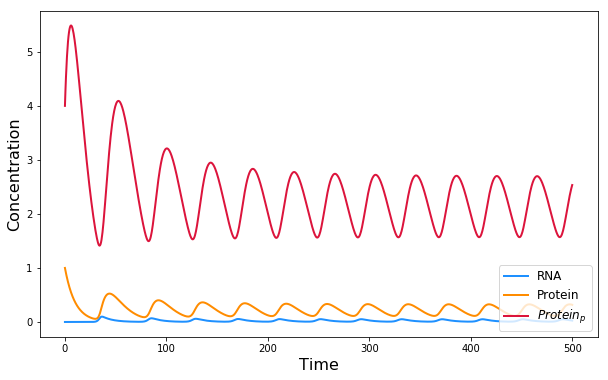

In [12]:
# define parameters here
k_1 = 1
k_2 = 0.1
k_3 =1
k_4 =  0.1
k_5 = 1
k_6 = 0.1
K_i = 1
n = 10
param = [k_1,k_2,k_3,k_4,k_5,k_6,K_i,n]

# define intital states
RNA_0 = 0
protein_0 = 1
protein_p_0 = 4
y_0 = [RNA_0,protein_0,protein_p_0]

tt = sp.linspace(0,500,1000)

# generate simulations 
sol_circ = odeint(circadian_ODEs,y_0,tt,args = (param,))

# plot results 
fig,ax = pl.subplots(1,1, figsize = (10,6))
ax.plot(tt,sol_circ[:,0], lw = line_width, color = color_rna, label = 'RNA')
ax.plot(tt,sol_circ[:,1], lw = line_width, color = color_protein, label = 'Protein')
ax.plot(tt,sol_circ[:,2], lw = line_width, color = color_initial_state, label = '$Protein_{p}$')
ax.set_ylabel('Concentration')
ax.set_xlabel('Time')
ax.legend()

## Effect of the protein decay rates and the cooperativity on the oscillation frequency

**Exercise 6.**
Change the protein decay rates to ```k_4 = k_6 = 0.2```

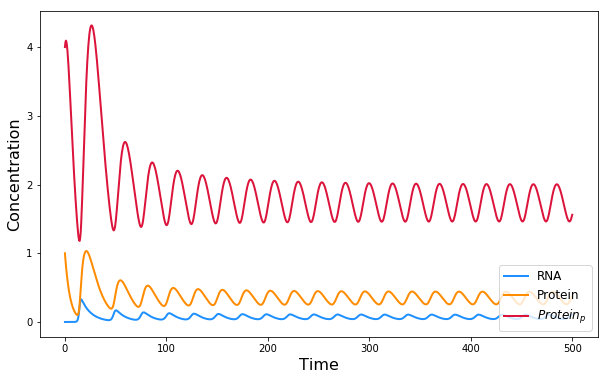

In [13]:
# define parameters here
k_1 = 1
k_2 = 0.1
k_3 =1
k_4 =  0.2
k_5 = 1
k_6 = 0.2
K_i = 1
n = 10
param = [k_1,k_2,k_3,k_4,k_5,k_6,K_i,n]

# define intital states
RNA_0 = 0
protein_0 = 1
protein_p_0 = 4
y_0 = [RNA_0,protein_0,protein_p_0]

tt = sp.linspace(0,500,1000)

# generate simulations 
sol_circ = odeint(circadian_ODEs,y_0,tt,args = (param,))

# plot results 
fig,ax = pl.subplots(1,1, figsize = (10,6))
ax.plot(tt,sol_circ[:,0], lw = line_width, color = color_rna, label = 'RNA')
ax.plot(tt,sol_circ[:,1], lw = line_width, color = color_protein, label = 'Protein')
ax.plot(tt,sol_circ[:,2], lw = line_width, color = color_initial_state, label = '$Protein_{p}$')
ax.set_ylabel('Concentration')
ax.set_xlabel('Time')
ax.legend()

**Exercise 7.** 
Change cooperativity factor to ```n = 3```

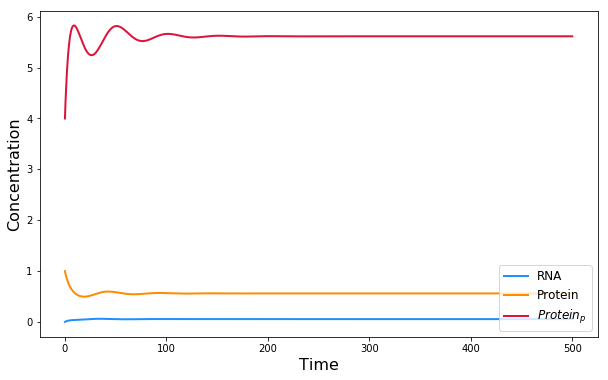

In [14]:
# define parameters here
k_1 = 1
k_2 = 0.1
k_3 =1
k_4 =  0.1
k_5 = 1
k_6 = 0.1
K_i = 1
n = 3
param = [k_1,k_2,k_3,k_4,k_5,k_6,K_i,n]

# define intital states
RNA_0 = 0
protein_0 = 1
protein_p_0 = 4
y_0 = [RNA_0,protein_0,protein_p_0]

tt = sp.linspace(0,500,1000)

# generate simulations 
sol_circ = odeint(circadian_ODEs,y_0,tt,args = (param,))

# plot results 
fig,ax = pl.subplots(1,1, figsize = (10,6))
ax.plot(tt,sol_circ[:,0], lw = line_width, color = color_rna, label = 'RNA')
ax.plot(tt,sol_circ[:,1], lw = line_width, color = color_protein, label = 'Protein')
ax.plot(tt,sol_circ[:,2], lw = line_width, color = color_initial_state, label = '$Protein_{p}$')
ax.set_ylabel('Concentration')
ax.set_xlabel('Time')
ax.legend()

**Questions:**
- What is the effect on the oscillation period?
- What is the effect on the dampening of the oscillations?

# Transcription-translation system modeled as stochastic system: single cell behaviour

Biochemical interactions in single cells can be random. For instance, various transcription factors are present in cells only in hundreds to thousands of copies, which is not much considering the size of the genome and that each gene is usually present in two alleles only. Such low copy numbers can create strong stochastic effects on the single cell level. In this part of the lecture we want to briefly dig into its implications. We use a so called Monte Carlo algorithm to simulate stochastic realistations of our transcription-translation system. We will test the effects of different parameter values on temporal fluctuations.

## The stochastic simulation algorithm

Developed mainly by Daniel Gillespie. The algorithm simulates the stochastic biochemical interactions of the reacting species, here RNA and protein, based on the current amount molecules of each species and the rates of the possible reactions. The algorithm essentially is a loop and in each iteration the next reaction that happens and the time point of the reaction are simulated based on random number generation. A deeper explanation of the algorithm can be found on [wikipedia](https://en.wikipedia.org/wiki/Gillespie_algorithm) or in the original publications of [D. Gillespie](http://pubs.acs.org/doi/abs/10.1021/j100540a008). [Here](https://www.ncbi.nlm.nih.gov/pubmed/17037977) you can find a comprehensible review of the algorithm, it's foundations and possible approximate implementations.

In contrast to the deterministic ODE system above the amount of RNA and protein now is not measured in concentrations but in the number of molecules of each species. The systems state is defined by the set of molecule counts. During each iteration of the algorithm the systems state is update according to the sampled reaction.

The system consists of four different reactions:

1. **RNA production:** $ RNA \xrightarrow{\beta} RNA + 1$
2. **RNA decay:** $RNA \xrightarrow{\gamma_{m}\cdot RNA} RNA - 1$
3. **Protein production:** $protein \xrightarrow{k\cdot RNA} protein + 1$
4. **Protein decay:** $protein \xrightarrow{\gamma_{p}\cdot protein} protein - 1$

The likelihood of each reaction depends of the current state of the system, i.e. the number of present RNA and protein molecules.

The **steady state** of the stochastic system is the same as for the deterministic ODE system. However, now we will observe fluctuations around the steady state. The characteristics of this fluctuations are controlled by the reaction rates. Time course measurements of fluctuations around the steady state allow to estimate the kinetic reaction rates which would not be for the ODE system.

In [15]:
# Gillespie algorithm to simulate the stochastic transcription-tranlsation system
def stoch_sim_transcription_translation(param,initial_state,tf):
    beta,gamma_m,k,gamma_p = param[0],param[1],param[2],param[3]
    
    # set reaction matrix, the systems state includes the time points of the reactions in the first column
    reactions = np.array([[0,1,0],
                         [0,-1,0],
                         [0,0,1],
                         [0,0,-1]])
    
    # initialise the system state
    state = np.zeros(3)
    state[1] = initial_state[0]
    state[2] = initial_state[1]
    STATE = state
    
    tt = 0
    while tt <= tf:
        # sample two random numbers uniformly between 0 and 1
        rr = sp.random.uniform(0,1,2)
        
        a_0 = beta + gamma_m*state[1] + k*state[1] + gamma_p*state[2]    
        a_s = np.array([beta,gamma_m*state[1],k*state[1],gamma_p*state[2]],dtype = float)
                    
        # sefine time step 
        tt = tt + 1. / a_0 * sp.log(1. / rr[0])
        state[0] = tt
        
        # find the next reaction
        prop = rr[1] * a_0
        cum_a_s = np.cumsum(a_s)
        
        ind = np.where(prop <= cum_a_s)[0][0]
        
        # update the systems state
        state = state+reactions[ind]
        
        STATE = np.vstack((STATE,state))
    
    return STATE

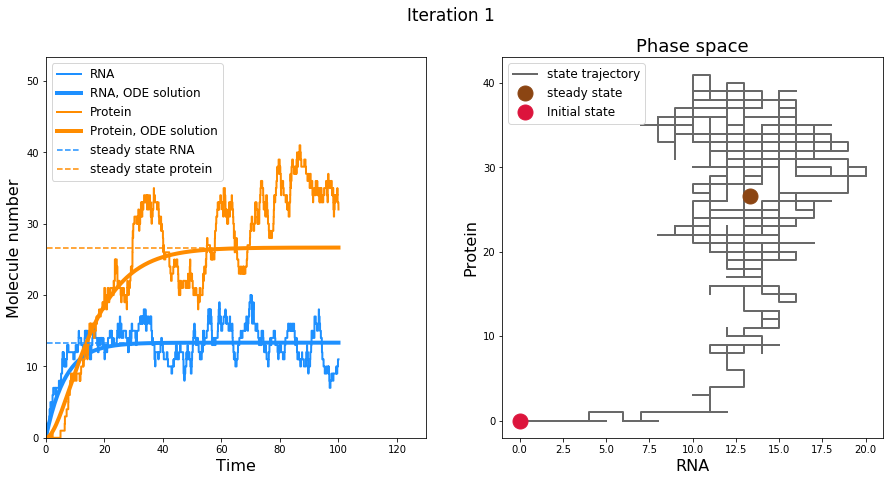

In [25]:
# define parameters  
k_1 = 2
d_1 = 0.15
k_2 = 0.2
d_2 = 0.1
param = [k_1,d_1,k_2,d_2]

# calculate steady states
steady_state_RNA = k_1/d_1
steady_state_protein = k_2*k_1/d_1/d_2

# define intial conditions
RNA_0 = 0
protein_0 = 0
y_0 = [RNA_0,protein_0] 

# simulate time
tf = 100
tt = sp.linspace(0,100,200)

# run stochastic simulation
sim = stoch_sim_transcription_translation(param,y_0,tf)

# run determinisitic simulation
sol_deterministic = odeint(solve_ODE_transcription_translation,y_0,tt,args = (param,))

fig,ax = pl.subplots(1,2, figsize = (15,7))
fig.suptitle("Iteration 1", size=17)

ax[0].plot(sim[:,0],sim[:,1], label = 'RNA', color = color_rna, lw = line_width,drawstyle = 'steps')
ax[0].plot(tt,sol_deterministic[:,0], color = color_rna, lw = 2*line_width, label = 'RNA, ODE solution')
ax[0].plot(sim[:,0],sim[:,2], label = 'Protein', color = color_protein,lw = line_width,drawstyle = 'steps')
ax[0].plot(tt,sol_deterministic[:,1], color = color_protein, lw = 2*line_width, label = 'Protein, ODE solution')

ax[0].plot(sim[:,0],np.zeros(len(sim[:,0])) + steady_state_RNA,'--', label = 'steady state RNA',
          color = color_rna)
ax[0].plot(sim[:,0],np.zeros(len(sim[:,0])) + steady_state_protein,'--', label = 'steady state protein',
          color = color_protein)

ax[0].legend(loc = 'best')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Molecule number')
ax[0].set_ylim(0,2*steady_state_protein)
ax[0].set_xlim(0,130)

ax[1].plot(sim[:,1],sim[:,2], label = 'state trajectory', lw = line_width,color = color_phase_space)
ax[1].plot(steady_state_RNA,steady_state_protein,'o',ms = 15,label = 'steady state', color = color_steady_state)
ax[1].plot(RNA_0,protein_0,'o',ms = 15,label = 'Initial state', color = color_initial_state)
ax[1].set_ylabel('Protein')
ax[1].set_xlabel('RNA')
ax[1].set_title('Phase space')
ax[1].legend(loc = 'best')

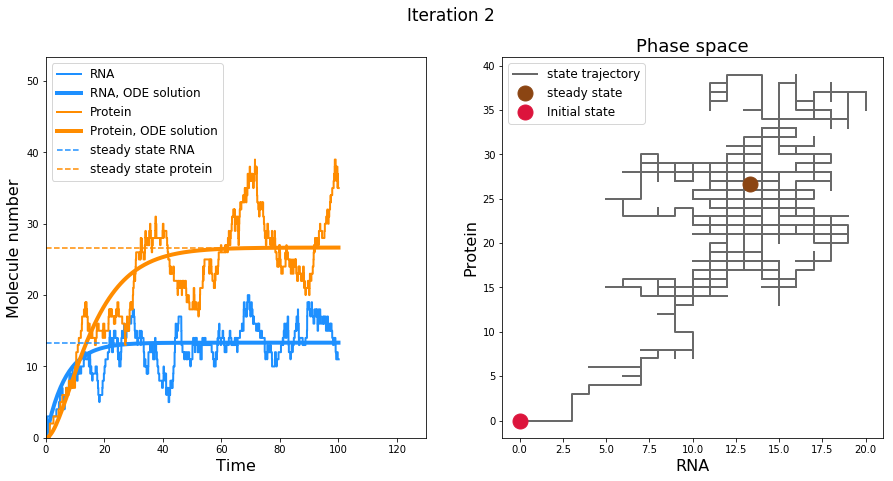

In [26]:
# define parameters  
k_1 = 2
d_1 = 0.15
k_2 = 0.2
d_2 = 0.1
param = [k_1,d_1,k_2,d_2]

# calculate steady states
steady_state_RNA = k_1/d_1
steady_state_protein = k_2*k_1/d_1/d_2

# define intial conditions
RNA_0 = 0
protein_0 = 0
y_0 = [RNA_0,protein_0] 

# simulate time
tf = 100
tt = sp.linspace(0,100,200)

# run stochastic simulation
sim = stoch_sim_transcription_translation(param,y_0,tf)

# run determinisitic simulation
sol_deterministic = odeint(solve_ODE_transcription_translation,y_0,tt,args = (param,))

fig,ax = pl.subplots(1,2, figsize = (15,7))
fig.suptitle("Iteration 2", size=17)

ax[0].plot(sim[:,0],sim[:,1], label = 'RNA', color = color_rna, lw = line_width,drawstyle = 'steps')
ax[0].plot(tt,sol_deterministic[:,0], color = color_rna, lw = 2*line_width, label = 'RNA, ODE solution')
ax[0].plot(sim[:,0],sim[:,2], label = 'Protein', color = color_protein,lw = line_width,drawstyle = 'steps')
ax[0].plot(tt,sol_deterministic[:,1], color = color_protein, lw = 2*line_width, label = 'Protein, ODE solution')

ax[0].plot(sim[:,0],np.zeros(len(sim[:,0])) + steady_state_RNA,'--', label = 'steady state RNA',
          color = color_rna)
ax[0].plot(sim[:,0],np.zeros(len(sim[:,0])) + steady_state_protein,'--', label = 'steady state protein',
          color = color_protein)

ax[0].legend(loc = 'best')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Molecule number')
ax[0].set_ylim(0,2*steady_state_protein)
ax[0].set_xlim(0,130)

ax[1].plot(sim[:,1],sim[:,2], label = 'state trajectory', lw = line_width,color = color_phase_space)
ax[1].plot(steady_state_RNA,steady_state_protein,'o',ms = 15,label = 'steady state', color = color_steady_state)
ax[1].plot(RNA_0,protein_0,'o',ms = 15,label = 'Initial state', color = color_initial_state)
ax[1].set_ylabel('Protein')
ax[1].set_xlabel('RNA')
ax[1].set_title('Phase space')
ax[1].legend(loc = 'best')

# Gene expression noise depends on transcription and translation rates

Due to the stochastic nature of biochemical reactions noise in the expression level of proteins is inherent. The noise level can be tuned by a cell by controlling the transcription and translation rates of a gene. On our simple we want to exemplify the effects on two examples:

1. High transcription rate and low tranlation rate
2. Low transcription rate and High translation rate

The steady state protein level for both cases is the same, but the fluctuations around it are very different. 

**Exercise 8.**

Below you find a simulation of our system for the first case with high transcription rate and low translation rate. 
- Creates simulations with low transcription and high translation rates.
- Estimate the expression noise by means of the Coefficient of variation ($CV= \frac{STD}{Mean}$).

**Questions:**
- How should you change the rates to keep the protein steady state fixed?
- Which effect do the inverse changes of the transcription and translation rates have on temporal fluctuations? What did you expect on your previous experience?
- What are mechanisms for a cell to either promote or suppress expression noise?

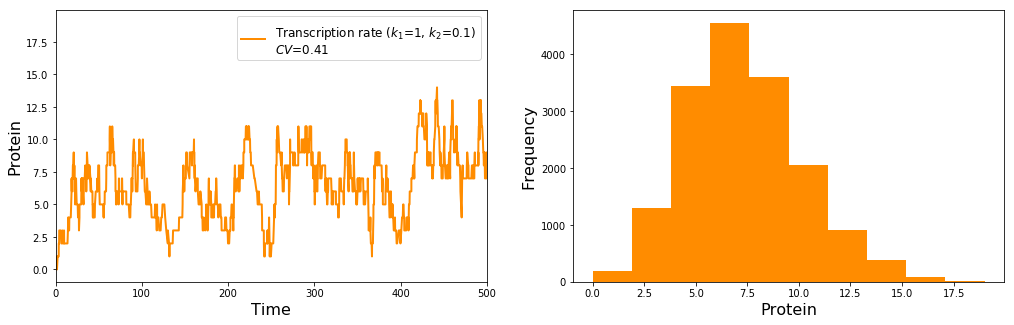

In [17]:
# define parameters
k_1 = 1 
k_2 = 0.1
d_1 = 0.15
d_2 = 0.1
param_k_1_high = [k_1,d_1,k_2,d_2]

# set time
tf = 5000

# set the initial state to the steady state
initial_state_k_1_high = [0,0]

# run stochastic simulation
sim_k_1_high = stoch_sim_transcription_translation(param_k_1_high,initial_state_k_1_high,tf)

# calculate coefficient of variation
CV_k_1_high = (sim_k_1_high[:,2].std()/sim_k_1_high[:,2].mean())

fig,ax = pl.subplots(1,2, figsize = (17,5))
ax[0].plot(sim_k_1_high[:,0], sim_k_1_high[:,2],
           lw=line_width, color=color_protein,
           label='Transcription rate ($k_1$={}, $k_2$={})\n$CV$={}'.format(
               k_1, k_2, np.round(CV_k_1_high, 2)))
ax[0].set_xlim(0,500)
ax[0].legend(loc='best')
ax[0].set_ylabel('Protein')
ax[0].set_xlabel('Time')
ax[1].hist(sim_k_1_high[:,2], color = color_protein);
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Protein')

## Influence of the RNA decay rate on temporal fluctuations

We will run stochastic simulations of the fluctuations around steady state and test the influence of the decay rates of RNA and protein while keeping the steady state constant. First lets start with the influence of the decay rate of the RNA. We define a range of RNA decay rates $\gamma_{m}$ and keep the RNA steady state fixed by adjusting the RNA production rate.

In [18]:
# define kinetic parameters
steady_state_RNA = 10
steady_state_protein = 20

# define range of synthesis and decay rates of the RNA
D_1 = np.array([0.01, 0.05, 0.1, 0.5])
k_1 = steady_state_RNA * D_1
d_2 = k_1 * steady_state_RNA / steady_state_protein
k_2 = 0.2

# set the inital conditions to the steady state
initial_state = np.round([steady_state_RNA,steady_state_protein])

# set the simulation time
tf = 500

# iterate over d_1
res = list()
for i,d_1 in enumerate(D_1):
    param = [k_1[i], d_1, k_2, d_2[i]]
    # run stochastic simulation
    sim = stoch_sim_transcription_translation(param, initial_state, tf)
    res.append(sim)

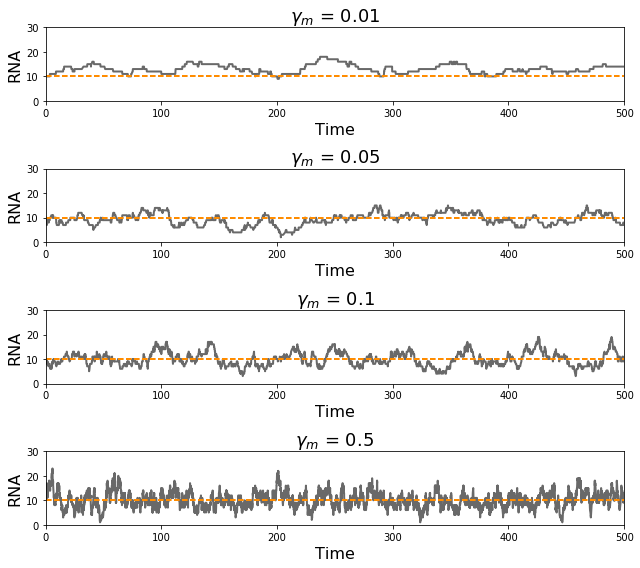

In [28]:
# define kinetic parameters
steady_state_RNA = 10
steady_state_protein = 20
# range of decay rates of the RNA
D_1 = np.array([0.01,0.05,0.1,0.5])
k_1 = steady_state_RNA * D_1
d_2 = k_1 * steady_state_RNA / steady_state_protein
k_2 = 0.2
# set the inital conditions to the steady state
initial_state = np.round([steady_state_RNA,steady_state_protein])
# set the simulation time longer than before for better statistics
tf = 500
# iteration over the defined d_1
res = []
for ii,d_1 in enumerate(D_1):
    param = [k_1[ii],d_1,k_2,d_2[ii]]
    sim = stoch_sim_transcription_translation(param,initial_state,tf)
    res.append(sim)
# visualize the results
fig,ax = pl.subplots(len(res),1, figsize = (9,8))
color = 'dimgrey'
color_ss = 'darkorange'
xmin,xmax = 0,tf
ymin_m,ymax_m = 0,30
ymin_p,ymax_p = 0,40
for ii,rr in enumerate(res):
    ax[ii].plot(rr[:,0],rr[:,1],color = color, lw = 2,
    label = '$\gamma_{m}$ = '+str(D_1[ii]))
    ax[ii].plot([0,tf],[steady_state_RNA,steady_state_RNA],'--',lw = 2, color = color_ss)
    ax[ii].set_ylim(ymin_m,ymax_m)
    ax[ii].set_xlim(xmin,xmax)
    ax[ii].set_ylabel('RNA')
    ax[ii].set_title('$\gamma_{m}$ = '+str(D_1[ii]))
    ax[ii].set_xlabel('Time')
    pl.tight_layout()